# Salary Prediction Portfolio



# Part 1 - Defining the problem that needs to be solved

An organization's ability to maintain a fair and balanced pay structure in line with internal and external (industry) factors is vital for it's success and employee retention KPI. Coming up with the right salary offer to candidates during recruitment process is crucial in attracting good talents to an organization.

The goal of this portfolio is predicting salaries for a new set of job posting with reliable accuracy by examining a set of job postings with salaries.

In [1]:
#import your libraries
#Analysis packages
import pandas as pd
import sklearn as sk
import numpy as np
import scipy.stats as sp
import pandas.util.testing as tm

#Visualization packages
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

#Models & Sklearn packages
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score as cvs
from sklearn.linear_model import LinearRegression as lr
from sklearn.ensemble import RandomForestRegressor as rfregr
from sklearn.ensemble import GradientBoostingRegressor as grbregr
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

#setting directory where python interpreter looks for code files
import sys
sys.path.insert(0, '/content/drive/My Drive/Colab Notebooks/scripts')

#read in functions from script file
from code_scripts import data_properties, merge_data, feature_plot, estimator_cv, training_models, print_results
from code_scripts import estimator_cv
#your info here
__author__ = "Laniya Oladapo"
__email__ = "laniyadapo@gmail.com"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import sys


## Part 2 - Data Discovery

### 2.1 Load Data 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wHjTWjJnQhIgvXljV2qHoaFDqFnniQQc4uLYkWSlr3uf0MjjxUzTyM
Mounted at /content/drive


In [2]:
#load the data into a Pandas dataframe
train_features = pd.read_csv("/content/drive/My Drive/Colab Notebooks/train_features.csv")
train_target = pd.read_csv("/content/drive/My Drive/Colab Notebooks/train_salaries.csv")
test_features = pd.read_csv("/content/drive/My Drive/Colab Notebooks/test_features.csv")

### 2.2 Examine & Get Insights on Data 

2.2.1 Inspecting the features of training set

In [3]:
data_properties(train_features)

###############################Dataset Properties###############################

 There are 1000000 rows and 8 columns

#########################The columns in the dataset are#########################
Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

######################The first 5 rows in the dataset are#######################
              jobId companyId  ... yearsExperience milesFromMetropolis
0  JOB1362684407687    COMP37  ...              10                  83
1  JOB1362684407688    COMP19  ...               3                  73
2  JOB1362684407689    COMP52  ...              10                  38
3  JOB1362684407690    COMP38  ...               8                  17
4  JOB1362684407691     COMP7  ...               8                  16

[5 rows x 8 columns]

############The data types and null values count in the dataset are#############
<class 'pandas.core.frame.DataFrame'>
Range

2.2.2 Inspecting the target variable of training set

In [4]:
data_properties(train_target)

###############################Dataset Properties###############################

 There are 1000000 rows and 2 columns

#########################The columns in the dataset are#########################
Index(['jobId', 'salary'], dtype='object')

######################The first 5 rows in the dataset are#######################
              jobId  salary
0  JOB1362684407687     130
1  JOB1362684407688     101
2  JOB1362684407689     137
3  JOB1362684407690     142
4  JOB1362684407691     163

############The data types and null values count in the dataset are#############
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB
None

####################The number of duplicates in the dataset#####################
0


2.2.3 Inspecting the features of test set

In [5]:
data_properties(test_features)

###############################Dataset Properties###############################

 There are 1000000 rows and 8 columns

#########################The columns in the dataset are#########################
Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

######################The first 5 rows in the dataset are#######################
              jobId companyId  ... yearsExperience milesFromMetropolis
0  JOB1362685407687    COMP33  ...              22                  73
1  JOB1362685407688    COMP13  ...              20                  47
2  JOB1362685407689    COMP10  ...              17                   9
3  JOB1362685407690    COMP21  ...              14                  96
4  JOB1362685407691    COMP36  ...              10                  44

[5 rows x 8 columns]

############The data types and null values count in the dataset are#############
<class 'pandas.core.frame.DataFrame'>
Range

2.2.4 Merging training datasets

In [6]:
# Merge training features and target variable datasets
merged_train_data = merge_data(train_features, train_target)

In [7]:
merged_train_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


2.2.5 Inspecting the merged dataset

In [8]:
data_properties(merged_train_data)

###############################Dataset Properties###############################

 There are 1000000 rows and 9 columns

#########################The columns in the dataset are#########################
Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

######################The first 5 rows in the dataset are#######################
              jobId companyId  ... milesFromMetropolis salary
0  JOB1362684407687    COMP37  ...                  83    130
1  JOB1362684407688    COMP19  ...                  73    101
2  JOB1362684407689    COMP52  ...                  38    137
3  JOB1362684407690    COMP38  ...                  17    142
4  JOB1362684407691     COMP7  ...                  16    163

[5 rows x 9 columns]

############The data types and null values count in the dataset are#############
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data col

In [9]:
#casting type to categorical data
merged_train_data[['companyId','jobType','major','degree','industry']]=merged_train_data[['companyId',
    'jobType','major','degree','industry']].astype('category')
merged_train_data.dtypes

jobId                    object
companyId              category
jobType                category
degree                 category
major                  category
industry               category
yearsExperience           int64
milesFromMetropolis       int64
salary                    int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd8c3b9e828>,
      dtype=object)

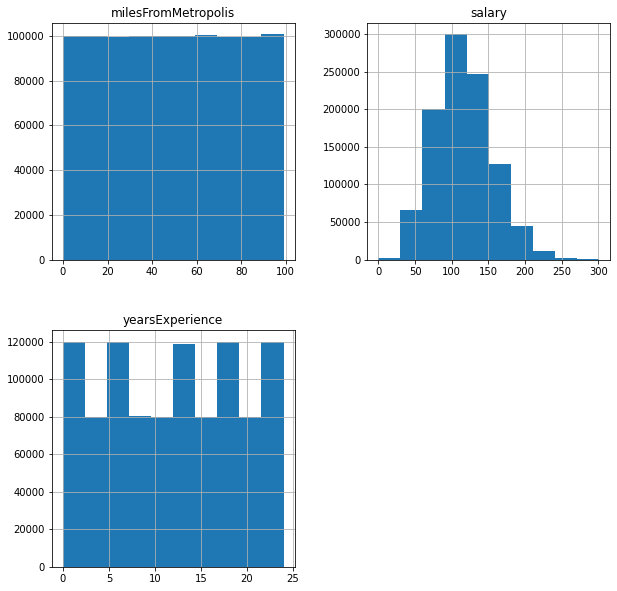

In [10]:
merged_train_data.hist(figsize=(10,10))

### 2.3 Clean data

2.3.1 Checking for duplicates in data

In [11]:
#Checking for duplicated Job Id in merged data
merged_train_data['jobId'].is_unique

True

2.3.2 Checking for missing data

In [12]:
merged_train_data.isnull().any()

jobId                  False
companyId              False
jobType                False
degree                 False
major                  False
industry               False
yearsExperience        False
milesFromMetropolis    False
salary                 False
dtype: bool

2.3.3 Visualize data to check and remove invalid target data

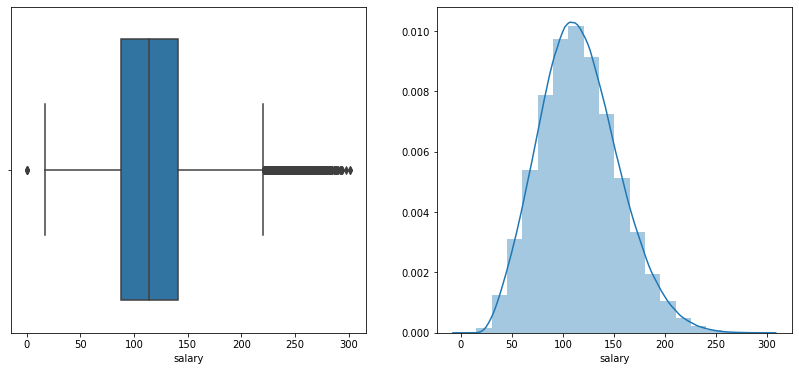

In [13]:
#Visualize target variable data 
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(merged_train_data.salary)
plt.subplot(1,2,2)
sns.distplot(merged_train_data.salary, bins=20)
plt.show()

2.3.3 Checking for potential outliers using the IQR rule

In [14]:
# Identify potential outliers
info = merged_train_data.salary.describe()
print(info)
IQR = info['75%'] - info['25%']
upper = info['75%'] + 1.5 * IQR
lower = info['25%'] - 1.5 * IQR
print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper, lower))

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64
The upper and lower bounds for suspected outliers are 220.5 and 8.5.


2.3.4 Investigate identified outliers

In [15]:
#checking lower bound suspected outliers 
merged_train_data[merged_train_data.salary < 8.5].count()

jobId                  5
companyId              5
jobType                5
degree                 5
major                  5
industry               5
yearsExperience        5
milesFromMetropolis    5
salary                 5
dtype: int64

In [16]:
#checking lower bound suspected outliers 
merged_train_data[merged_train_data.salary < 8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


Findings: All these are invalid data considering the various jobtypes are more likely not to be volunteers. Hence the data needs to be dropped.

In [17]:
#dropping invalid salary values and confirm data dropped.
merged_train_data.drop(merged_train_data[merged_train_data.salary <8.5].index, inplace=True)
merged_train_data.shape

(999995, 9)

In [18]:
#checking upper bound suspected outliers 
merged_train_data.loc[merged_train_data.salary > 220.5, 'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
JANITOR              0
Name: jobType, dtype: int64

Findings: Asides the Junior roles, all the other job types are senior level hence expected to be high earners. Inspect the Junior type roles to confirm.

In [19]:
#checking upper bound most suspicious potential outliers
merged_train_data[(merged_train_data.salary > 220.5) & (merged_train_data.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


Findings: The Junior job types are for individuals with high degrees, high years of experience and industries with typical high compensation rates. Hence they will be retained in the data.

### 2.4 EDA - Data Exploration

2.4.1 Summary of Feature and Target Variables

In [20]:
#summarize variables
merged_train_data.describe(include = "all")

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
count,999995,999995,999995,999995,999995,999995,999995.000000,999995.000000,999995.000000
unique,999995,63,8,5,9,7,NaN,NaN,NaN
top,JOB1362685059169,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB,NaN,NaN,NaN
freq,1,16193,125886,236975,532353,143205,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,11.992407,49.529381,116.062398
std,NaN,NaN,NaN,NaN,NaN,NaN,7.212390,28.877721,38.717163
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,17.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,25.000000,88.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,50.000000,114.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,75.000000,141.000000


2.4.2 Review correlation between each feature and the target variable

In [21]:
# Function to create plots to check correlation of features with the target variable
def feature_plot(df, col):
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)  

    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    elif col == 'companyId':
        mean = df.groupby(col)['salary'].mean()
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace = True)
        df[col].value_counts().plot()
    else:
        #change the categorical variable to category type and order their level by the mean salary
        #in each category
        frequency = df[col].value_counts()
        sub_categories = pd.unique(df[col])
        sns.barplot(x = sub_categories, y = frequency, data = df)
    plt.xticks(rotation = 45)
    plt.xlabel(col)
    plt.ylabel('counts')
    plt.subplot(1, 2, 2)
    
    if df[col].dtype == 'int64' or col == 'companyId':
        mean = df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
    else:
        sns.boxplot(x = col, y = 'salary', data = df)
        
    plt.xticks(rotation = 45)
    plt.ylabel('salaries')
    plt.show()

2.4.2.1 Correlation between Companies (feature variable) and Salary (target variable)

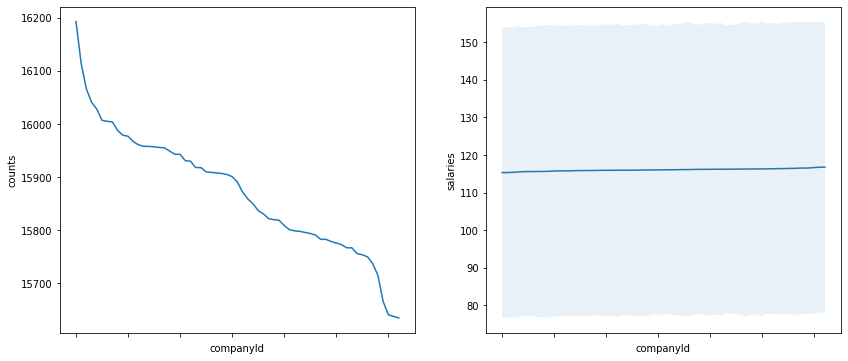

In [22]:
feature_plot(merged_train_data, 'companyId')

Findings: There are 63 different companies with varying number of samples in the dataset. Plot shows that there is generally a weak correlation between companies and salaries. There is no significant increase in the mean salary across companies.

2.4.2.2 Correlation between Job Types (feature variable) and Salary (target variable)

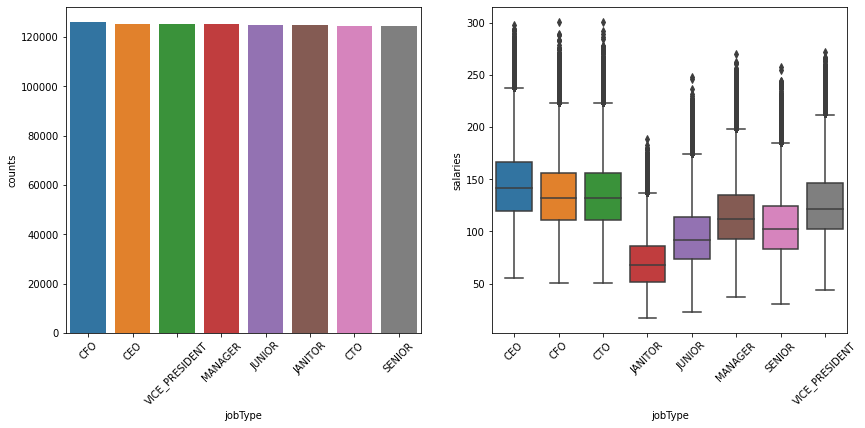

In [23]:
feature_plot(merged_train_data, 'jobType')

Findings: There are 8 different job types with similar number of samples in the training dataset from junior level (janitor) to senior level Chief Executive Officer (CEO). As anticipated the plot shows salary bands increase relative to the level of role seniority in the organization which indicates a positive correlation between job type and salary. 

2.4.2.3 Correlation between Degrees (feature variable) and Salary (target variable)

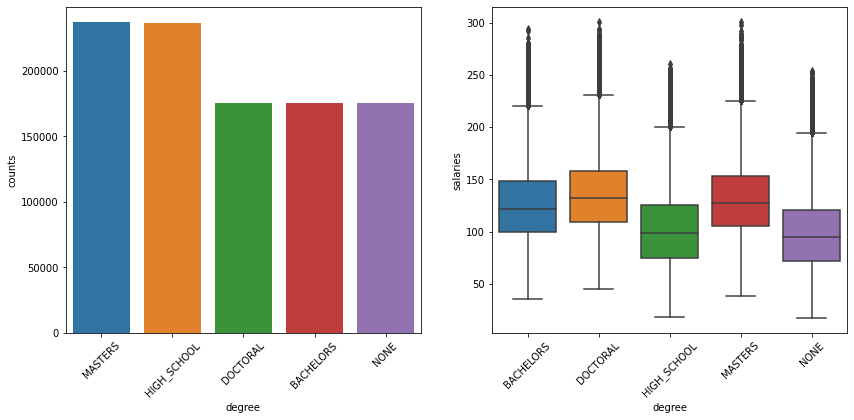

In [24]:
feature_plot(merged_train_data, 'degree')

In [25]:
merged_train_data.loc[merged_train_data.degree == 'NONE', 'jobType'].value_counts()

JANITOR           62544
SENIOR            25117
MANAGER           25092
CEO               24898
CTO               24882
VICE_PRESIDENT    24825
JUNIOR            24781
CFO               24714
Name: jobType, dtype: int64

Findings: There are 5 different levels of degrees with varying samples in the training dataset from No Degree (None) to Doctoral. The Janitors have the highest number of samples in the NONE degree category, which is understandable. The plot shows the more advanced degrees show a positive correlation to salary.

2.4.2.4 Correlation between Majors (feature variable) and Salary (target variable)

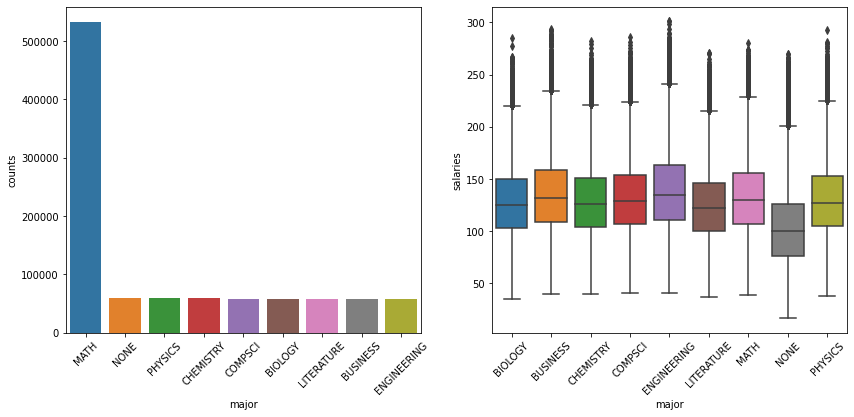

In [26]:
feature_plot(merged_train_data, 'major')

In [27]:
merged_train_data.loc[merged_train_data.major == 'NONE', 'jobType'].value_counts()

JANITOR           124971
VICE_PRESIDENT     58463
SENIOR             58378
MANAGER            58288
CTO                58160
JUNIOR             58127
CEO                58024
CFO                57942
Name: jobType, dtype: int64

Findings: There are 8 different major types and 1 type with no majors (None).  Data shows the NONE major type employees are mostly janitors. The plot shows weak correlation between Majors and Salary. The plot also shows the NONE major group are the lowest salary band as typically anticipated and there are more Maths major employees in the data set.

2.4.2.5 Correlation between Industries (feature variable) and Salary (target variable)

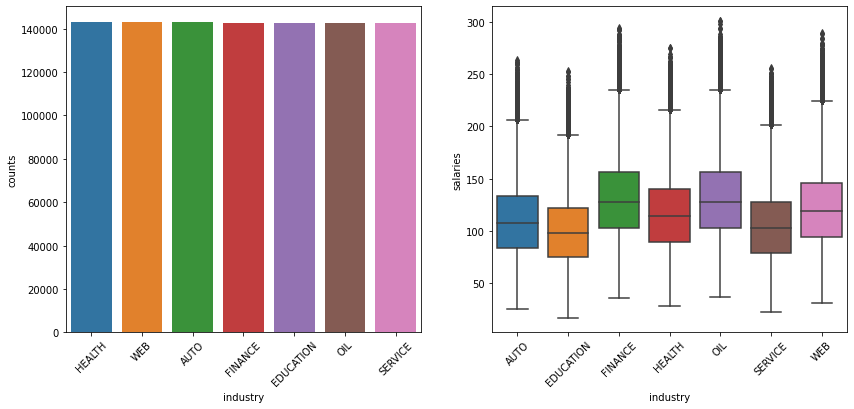

In [28]:
feature_plot(merged_train_data, 'industry')

Findings: There are 7 industries with similar number of samples in the training dataset. Generally there is a weak correlation between industry and salary. The plot also shows oil and finance industries generally have higher compensation band.

2.4.2.6 Correlation between Years of Experience (feature variable) and Salary (target variable)

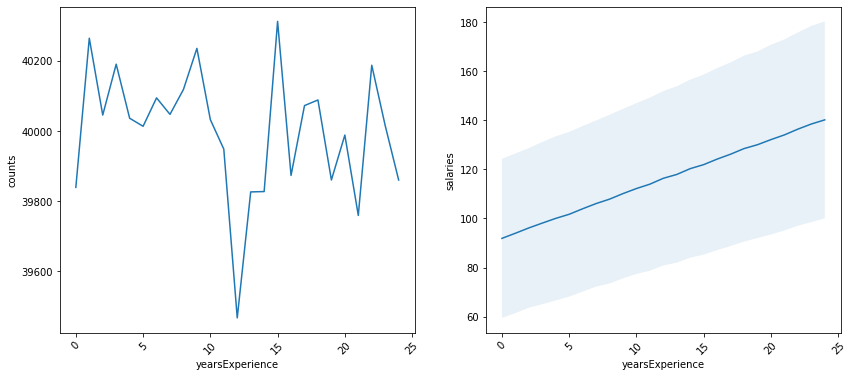

In [29]:
feature_plot(merged_train_data, 'yearsExperience')

Findings: The years of experience range from 0 - 24 years across the training dataset. The plot shows a positive correlation between years of experience and salary.

2.4.2.7 Correlation between Miles From Metropolis (feature variable) and Salary (target variable)

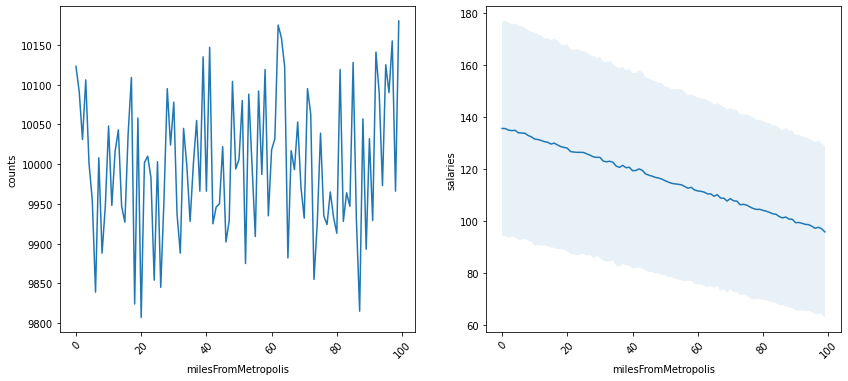

In [30]:
feature_plot(merged_train_data, 'milesFromMetropolis')

Findings: The farthest distance from metropolis in 99 miles. The plot shows a negative correlation between miles from metropolis and salary. 

2.4.3 Identify correlation between features

The following function is applied to all columns of the dataframe and encodes the subcategories with the mean of the salary of each category respectively.

In [31]:
def encode_label(df, col):
    cat_dict = {}
    cats = df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = merged_train_data[merged_train_data[col] == cat]['salary'].mean()
    df[col] = df[col].map(cat_dict)

In [32]:
#Create a copy the train dataframe to use for analysis
analysis_data = merged_train_data.copy()

In [33]:
#apply the encode_label function on categorical data
for col in analysis_data.columns:
  if analysis_data[col].dtype.name == 'category':
    encode_label(analysis_data, col)

In [34]:
analysis_data.describe()

,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


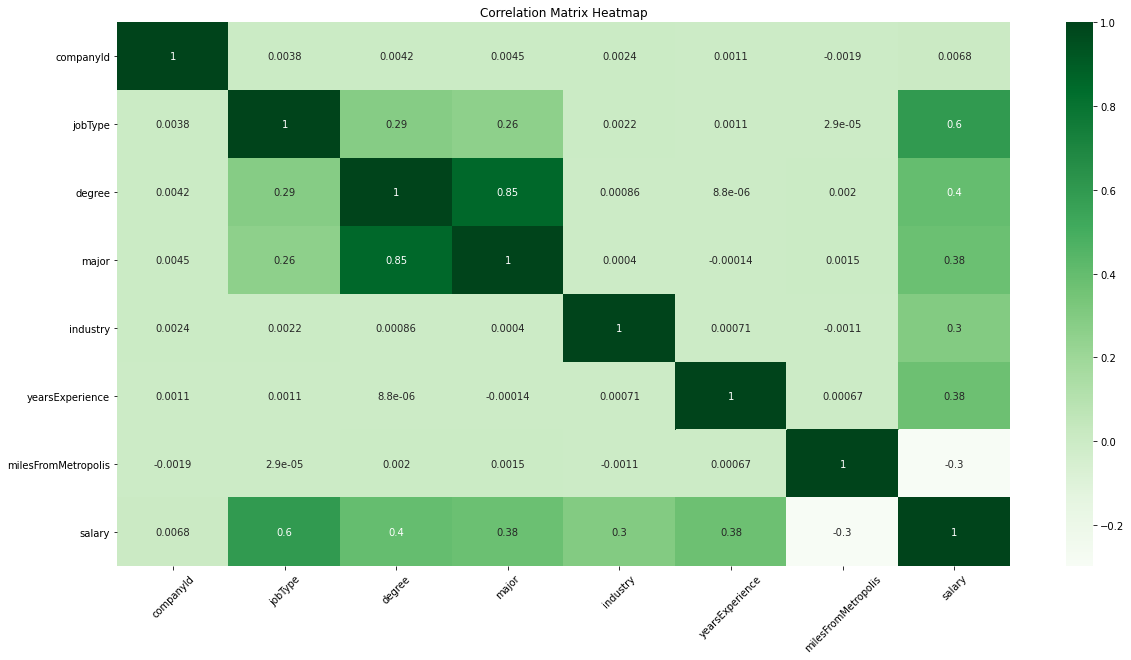

In [35]:
#Create Heatmap to highlight the correlations
fig = plt.figure(figsize=(20, 10))
features = ['companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']
analysis_data[features] = analysis_data[features].astype(int)
sns.heatmap(analysis_data[features + ['salary']].corr(), cmap='Greens', annot=True)
plt.xticks(rotation=45)
plt.title('Correlation Matrix Heatmap')
plt.show()

Findings: The heatmap shows Major and Degree have the highest positive strong correlation whilst Jobtype is moderately correlated to Degree and Major. JobType has the strongest correlation with salary, then degree, major and yearsExperience in that correlation order.

### 2.5 Establish a baseline

2.5.1 First step is to create a simple baseline model. Job Type has the strongest correlation to salary hence we wil utilise the average salary based on jobType subcategories as our prediction algorithm and then measure the result using MSE as the metric.

In [36]:
# This function predicts salary based on subcategories of a given categorical feature
def average_based_salary_predictor(df, col):
    cat_dict = {}
    salary_prediction = []
    cats = df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = merged_train_data[merged_train_data[col] == cat]['salary'].mean()
    salary_prediction = df[col].map(cat_dict)
    return salary_prediction

In [37]:
# We apply the function on job type and calculate the score
baseline_mse = mse(merged_train_data['salary'], average_based_salary_predictor(merged_train_data, 'jobType'))
print('The baseline mean squared error =',baseline_mse )

The baseline mean squared error = 963.9252996562975


With a baseline mean squared error established, our next task is to improve the score.

### 2.6 Hypothesize Solution

Considering the baseline model salary prediction is based on data provided without fitting, feature generation or model tuning we will utilize supervised machine learning algorithms to improve the accuracy of the predicted salaries.

The salary prediction expected output is a continuous value hence we will use from the suite of regression supervised learning algorithms. 

1. Linear Regression - simple to implement and easier to interpret the output coefficients.
2. Linear Regression with Interaction variables - explore the significance of relationships between various features.
3. Random Forest Regressor - improves the accuracy by reducing overfitting problem and the variance in decision trees.
4. GradientBoostingRegressor - Typically produces best predictions because it can optimize on different loss functions and provides several hyperparameter tuning options that make the function fit very flexible.

## Part 3 - DEVELOP

### 3.1 Feature Engineering 

Most machine learning models can only handle numerical values.

In order to get the data ready for modelling we will transform categorical features into individual binary feature using the one hot encoding approach. 

In [38]:
#This function one-hot-encodes all the categorical features and combines them with numerical ones
def one_hot_encode_data (df, cat_vars = None, num_vars = None):
    cat_df = pd.get_dummies(df[['jobType', 'major', 'degree', 'industry']], drop_first=True)
    num_df = df[['yearsExperience', 'milesFromMetropolis', 'salary']].apply(pd.to_numeric)
    return pd.concat([cat_df, num_df], axis = 1, ignore_index = False)

In [39]:
model_data = one_hot_encode_data(merged_train_data, cat_vars = None, num_vars = None)

In [40]:
model_data.describe()

,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,major_BUSINESS,major_CHEMISTRY,major_COMPSCI,major_ENGINEERING,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,degree_DOCTORAL,degree_HIGH_SCHOOL,degree_MASTERS,degree_NONE,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000,999995.000000
mean,0.124370,0.125046,0.124972,0.124593,0.125121,0.125887,0.125235,0.058518,0.058875,0.058382,0.058594,0.058684,0.057800,0.532356,0.058410,0.175363,0.236976,0.175311,0.236854,0.142820,0.142867,0.142756,0.142771,0.142640,0.143206,11.992407,49.529381,116.062398
std,0.330003,0.330771,0.330687,0.330257,0.330856,0.331722,0.330985,0.234721,0.235391,0.234465,0.234864,0.235033,0.233366,0.498952,0.234518,0.380277,0.425228,0.380233,0.425152,0.349889,0.349937,0.349824,0.349839,0.349705,0.350283,7.212390,28.877721,38.717163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,25.000000,88.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,50.000000,114.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,75.000000,141.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,24.000000,99.000000,301.000000


In [41]:
model_data.columns

Index(['jobType_CFO', 'jobType_CTO', 'jobType_JANITOR', 'jobType_JUNIOR',
       'jobType_MANAGER', 'jobType_SENIOR', 'jobType_VICE_PRESIDENT',
       'major_BUSINESS', 'major_CHEMISTRY', 'major_COMPSCI',
       'major_ENGINEERING', 'major_LITERATURE', 'major_MATH', 'major_NONE',
       'major_PHYSICS', 'degree_DOCTORAL', 'degree_HIGH_SCHOOL',
       'degree_MASTERS', 'degree_NONE', 'industry_EDUCATION',
       'industry_FINANCE', 'industry_HEALTH', 'industry_OIL',
       'industry_SERVICE', 'industry_WEB', 'yearsExperience',
       'milesFromMetropolis', 'salary'],
      dtype='object')

In [42]:

features = ['jobType_CFO', 'jobType_CTO', 'jobType_JANITOR', 'jobType_JUNIOR',
       'jobType_MANAGER', 'jobType_SENIOR', 'jobType_VICE_PRESIDENT',
       'major_BUSINESS', 'major_CHEMISTRY', 'major_COMPSCI',
       'major_ENGINEERING', 'major_LITERATURE', 'major_MATH', 'major_NONE',
       'major_PHYSICS', 'degree_DOCTORAL', 'degree_HIGH_SCHOOL',
       'degree_MASTERS', 'degree_NONE', 'industry_EDUCATION',
       'industry_FINANCE', 'industry_HEALTH', 'industry_OIL',
       'industry_SERVICE', 'industry_WEB', 'yearsExperience',
       'milesFromMetropolis']
feature_train, feature_tune, target_train, target_tune = train_test_split(model_data[features], model_data['salary'], test_size=0.33, random_state=0, shuffle=True)

### 3.2 Models Creation

3.2.1 As mentioned in section 2.6 above, 4 algorithms are used to create the models in this project. Hyperparameter tuning was done using the Google Colab TPU platform due to large computing resources required. The parameters used for the models are the results of the tuning process.

In [43]:
# create models
# Model 1: Linear Regression
LinearRegression = lr()
# Model 2: Linear Regression with Interaction
LR_interaction = lr()
# Model 3: Random Forest and Gradient Boosting
rfr = rfregr(random_state=42, n_estimators=200, max_depth=40, criterion='mse', min_samples_split=40, max_features=15)
# Model 4: Random Forest and Gradient Boosting
grb = grbregr(random_state=42, n_estimators=200, criterion='mse', min_samples_split=2, max_depth=10, min_samples_leaf=40, subsample=1, learning_rate=0.08)

3.2.2 Steps of hyperparameter tuning done with Random Grid Search using the Google Colab TPU platform for Random Forest Model

In [ ]:
rf = rfregr(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())
#Parameters currently in use:

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = [3, 6, 9, 12, 15]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(6, 60, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [20, 40, 60, 80]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': [3, 6, 9, 12, 15], 'max_depth': [6, 12, 18, 24, 30, 36, 42, 48, 54, 60, None], 'min_samples_split': [20, 40, 60, 80], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = rfregr()
# Random search of parameters, using 3 fold cross validation, 
# search across 4 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(feature_train, target_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 194.2min


In [ ]:
#View the best parameters from fitting the random search:
rf_random.best_params_

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = rfregr(n_estimators = 100, random_state = 42)
base_model.fit(feature_train, target_train)
base_accuracy = evaluate(base_model, feature_tune, target_tune)

In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, feature_tune, target_tune)
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

3.2.3 Steps of hyperparameter tuning done using the Google Colab TPU platform for Gradient Boost Model

In [ ]:
def select_params(feature_train, target_train, feature_tune, target_tune, max_estimators=1000, max_depth = 3, learning_rate=0.01):

    #feature_train, feature_tune, target_train, target_tune = train_test_split(model_data[features], model_data['salary'], test_size=0.33, random_state=0, shuffle=True)
    
    gbm = grbregr(n_estimators = max_estimators, learning_rate=learning_rate, 
                                    max_depth=max_depth, loss='ls', subsample=1.0)

    gbm.fit(feature_train, target_train)

    test_score = np.zeros(max_estimators)

    for i, y_pred in enumerate(gbm.staged_predict(feature_tune)):
        test_score[i] = mse(target_tune, y_pred)
        
    print('optimal number of trees: {0}'.format(test_score.argmin()))
    print('best MSE: {0}'.format(test_score.min()))
    # print('baseline MSE: {0}'.format(mse(target_tune, target_train.median())))
    pd.Series(test_score).plot(title='learning curve for max_depth = {0}'.format(max_depth))
    plt.show()

In [ ]:
for depth in [6, 8, 10, 12]:
    print('***** training for max depth = {0} *****'.format(depth))
    select_params(feature_train, target_train, feature_tune, target_tune, max_estimators=40, max_depth=depth, learning_rate=0.1)

Max Depth of 10 computes best MSE, next we tune for Max Estimator.

In [ ]:
for max_e in [100, 200, 300, 400]:
    print('***** training for max estimators = {0} *****'.format(max_e))
    select_params(feature_train, target_train, feature_tune, target_tune, max_estimators=max_e, max_depth=10, learning_rate=0.08)

### 3.3 Models Evaluation

3.3.1 Compile the selected models for evaluation

In [44]:
# create models
models_eval = []
models_eval.append(('LinearRegression', lr()))
models_eval.append(('LR_interaction', lr()))
models_eval.append(('RandomForest', rfregr(random_state=42, n_estimators=200, max_depth=40, criterion='mse', min_samples_split=40, max_features=15)))
models_eval.append(('GradientBoosting', grbregr(random_state=42, n_estimators=200, criterion='mse', min_samples_split=2, max_depth=10, min_samples_leaf=40, subsample=1, learning_rate=0.08)))

print(models_eval)

[('LinearRegression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)), ('LR_interaction', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)), ('RandomForest', RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=40, max_features=15, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=40, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)), ('GradientBoosting', GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mse', init=None,
                          learning_rate=0.08, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=

3.3.2 This function is to create variables for the Logistic Regression with Interaction model.

In [45]:
def create_interactions(data):
    interactions = PolynomialFeatures(interaction_only=True, include_bias=False)
    interaction_vars = interactions.fit_transform(data)
    return interaction_vars

3.3.3 Interaction variables are created for the split feature training data

In [46]:
# Creating interaction variables
interaction_vars = create_interactions(feature_train)
interaction_vars

array([[0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 1.08e+03],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 5.00e+01],
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 2.30e+01],
       ...,
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 1.38e+02],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 9.00e+01],
       [0.00e+00, 0.00e+00, 1.00e+00, ..., 0.00e+00, 0.00e+00, 2.04e+02]])

3.3.4 This function is to evaluate the models using the cross validation technique on the split feature training data

In [ ]:
scoring='neg_mean_squared_error'

avg_scores = []
std_dev = []
model_names = []

for model_name, model in tqdm(models_eval):
  if model_name == 'LR_interaction':
    score = cvs(model, interaction_vars, target_train, cv=5, scoring='neg_mean_squared_error')
    scores = abs(score) # MSE scoring is negative in cross_val_score
    avg_score = np.mean(scores)
    std = np.std(scores)
    avg_scores.append(avg_score)
    std_dev.append(std) 
  else:
    score = cvs(model, feature_train, target_train, cv=5, scoring='neg_mean_squared_error')
    scores = abs(score) # MSE scoring is negative in cross_val_score
    avg_score = np.mean(scores)
    std = np.std(scores)
    avg_scores.append(avg_score)
    std_dev.append(std) 
  output = "%s: %f (%f)" % (model_name, avg_score, std)
  print(output)

 25%|██▌       | 1/4 [00:02<00:07,  2.55s/it]

LinearRegression: 384.300352 (1.159185)


 50%|█████     | 2/4 [01:29<00:55, 27.74s/it]

LR_interaction: 353.665577 (1.303416)


 75%|███████▌  | 3/4 [21:42<06:23, 383.41s/it]

RandomForest: 368.245383 (1.165934)


100%|██████████| 4/4 [59:33<00:00, 893.25s/it]

GradientBoosting: 359.852918 (1.308665)


### 3.4 Models Testing

3.4.1 This function is to test the prediction from each model on the split feature testing data

In [ ]:
scoring='neg_mean_squared_error'

MSE_scores = []
std_dev_test = []
model_names_test = []

for model_name, model in tqdm(models_eval):
  if model_name == 'LR_interaction':
    model_test = model.fit(interaction_vars, target_train)
    test_interaction_var = create_interactions(feature_tune)
    prediction = model_test.predict(test_interaction_var)
    MSE_score = mse(target_tune, prediction)
    MSE_scores.append(MSE_score)
  else:
    model_test = model.fit(feature_train, target_train) 
    prediction = model_test.predict(feature_tune)
    MSE_score = mse(target_tune, prediction)
    MSE_scores.append(MSE_score)
  output = "%s: %f" % (model_name, MSE_score)
  print(output)

 25%|██▌       | 1/4 [00:00<00:02,  1.24it/s]

LinearRegression: 384.630204


 50%|█████     | 2/4 [00:25<00:15,  7.93s/it]

LR_interaction: 354.760187


 75%|███████▌  | 3/4 [06:15<01:50, 110.55s/it]

RandomForest: 368.313327


100%|██████████| 4/4 [16:43<00:00, 250.96s/it]

GradientBoosting: 359.880599


In [47]:
MSE_scores = [384.6302037213719, 354.7601865387493, 368.3133273997825, 359.8805986584317]
MSE_scores

[384.6302037213719, 354.7601865387493, 368.3133273997825, 359.8805986584317]

In [48]:
def models_scores_plot():
    all_scores = MSE_scores
    names = ['Linear Regression', 'Linear Regression with Interactions', 'Random Forest', 'Gradient Boosting']
    fig, ax = plt.subplots(figsize=(15,7))
    plt.style.use('dark_background')
    plt.ylabel('MSE_scores', fontsize=15, fontweight='bold')
    plt.xlabel('models_eval', fontsize=15, fontweight='bold')
    plt.xticks(fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12, fontweight='bold')
    ax.bar(names, MSE_scores)
    plt.show()

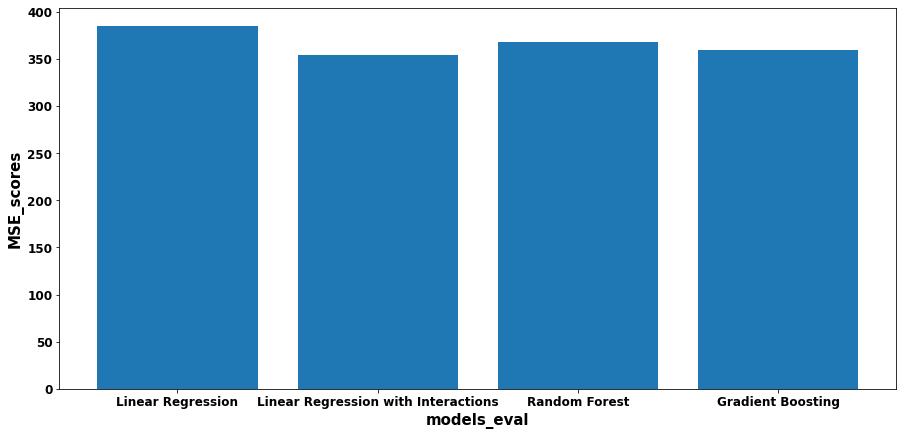

In [49]:
models_scores_plot()

Findings :  Linear Regression with interactions has the best MSE value of ~355. Hence it will be used to predict the predict the test dataset.

### 3.5 Best Model Selection

In [50]:
bestModel = LR_interaction
bestModel

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Part 4 - DEPLOY

### 4.1 Train best model selected on the entire training data

4.1.1 Interaction variables are created for the entire training data 

In [51]:
# Creating interaction variables
full_train_vars = create_interactions(model_data[features])
full_train_vars

array([[1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        8.300e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 3.000e+00, 7.300e+01,
        2.190e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        3.800e+02],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.296e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        3.000e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        2.200e+02]])

4.1.2 The best model is fitted to the entire training data using the interaction variables created in section 4.1.1 above. 

In [52]:
#Train best model on the whole training data
bestModel.fit(full_train_vars, model_data['salary'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 4.2 Score the Test Dataset

4.2.1 Test data was inspected and explored in section 2.2.1 above. No null values identified. The data will undergo same encoding and manipulation routine to match the shape of the train dataset.

This function is to perform feature engineering on the test data

In [53]:
#This function one-hot-encodes all the categorical features and combines them with numerical ones
def one_hot_encode_testdata (df, cat_vars = None, num_vars = None):
    cat_df = pd.get_dummies(df[['jobType', 'major', 'degree', 'industry']], drop_first=True)
    num_df = df[['yearsExperience', 'milesFromMetropolis']].apply(pd.to_numeric)
    return pd.concat([cat_df, num_df], axis = 1, ignore_index = False)

4.2.2 Test data encoded using funtion defined in section 4.2.1 above.

In [54]:
#encoding test dataset
test_data = one_hot_encode_testdata(test_features, cat_vars = None, num_vars = None)
test_data.head(10)

,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,major_BUSINESS,major_CHEMISTRY,major_COMPSCI,major_ENGINEERING,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,degree_DOCTORAL,degree_HIGH_SCHOOL,degree_MASTERS,degree_NONE,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB,yearsExperience,milesFromMetropolis
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,22,73
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,20,47
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,17,9
3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,14,96
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,10,44
5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,23
6,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,6,32
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,9,73
8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,6,78
9,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,23,97


4.2.3 Interaction variables are created for the test dataset

In [55]:
# Creating interaction variables
test_data_vars = create_interactions(test_data)
test_data_vars

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.606e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        9.400e+02],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.530e+02],
       ...,
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        9.100e+01],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        8.820e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        4.960e+02]])

4.2.4 Salary predictions based on test data features are generated using the selected best model

In [56]:
salary_predictions = bestModel.predict(test_data_vars)
salary_predictions

array([111.40479671,  92.84943477, 183.18293014, ...,  55.16981058,
       161.27786635, 112.35042371])

4.2.5 Combine the original test data and the predicted salaries

In [57]:
# updating the test dataset with the additional 'predisted_salary' column
test_features['salary'] = salary_predictions.tolist()

In [58]:
test_features.head(20)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73,111.404797
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47,92.849435
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9,183.182930
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96,103.873477
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44,116.089035
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23,155.023772
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32,97.697212
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73,118.802391
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78,105.878875
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23,97,98.089071


4.2.6 Export the final dataset to a csv file

In [59]:
#Exporting the final predicted dataset to a csv file
test_features.to_csv('test_salaries.csv')

### 4.3 Feature Importance

4.3.1 Fit the Gradient Boosting Model to the coded training data to compute feature importance

In [60]:
grb.fit(model_data[features], model_data['salary'] )

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mse', init=None,
                          learning_rate=0.08, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=40, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

4.3.2 Generate and plot the sorted feature importance data.

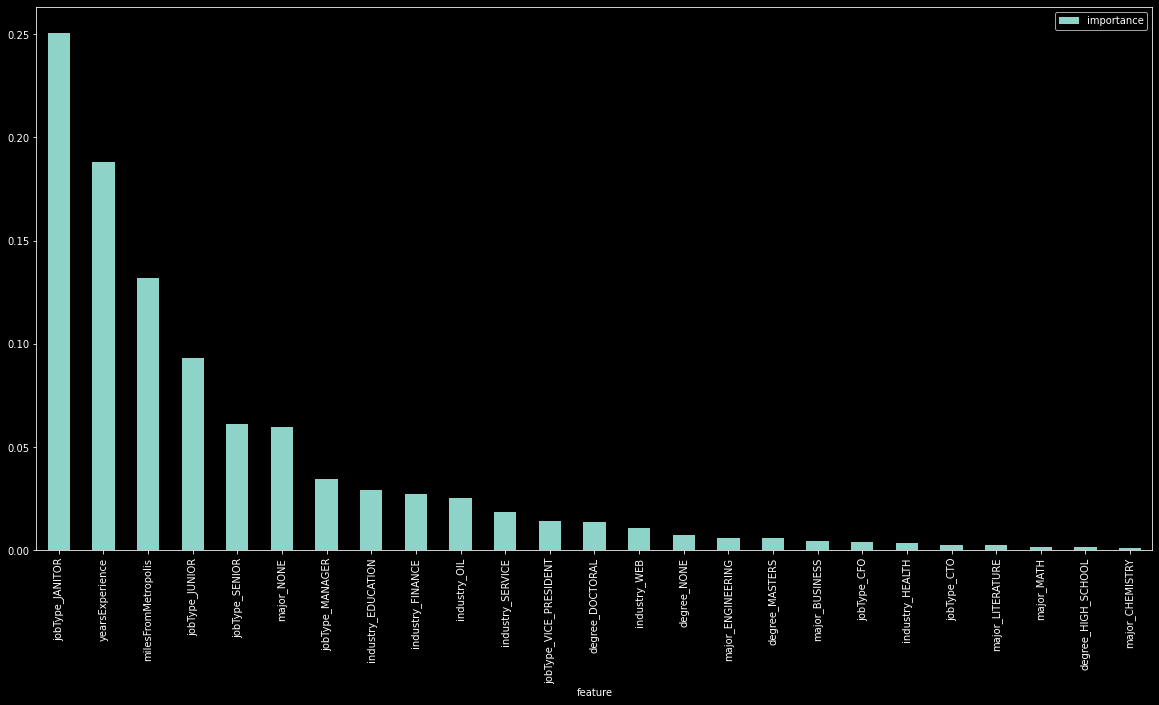

In [61]:
# store feature importances

if hasattr(grb, 'feature_importances_'):
    importances = grb.feature_importances_

else:
    # for linear models which don't have feature_importances_
    importances = [0]*len(model_data[features].columns)

feature_importances = pd.DataFrame({'feature':model_data[features].columns, 'importance':importances})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
    
# set index to 'feature'
feature_importances.set_index('feature', inplace=True, drop=True)
    
# create plot
feature_importances[0:25].plot.bar(figsize=(20,10))
plt.show()

Findings :  Plot shows the importance of each feature in the prediction of the salary. Years of experience and Miles From Metropolis are in the 10 features.

### 4.4 Summarize the predicted Salaries

We'll skip this step since we don't have the outcomes for the test data

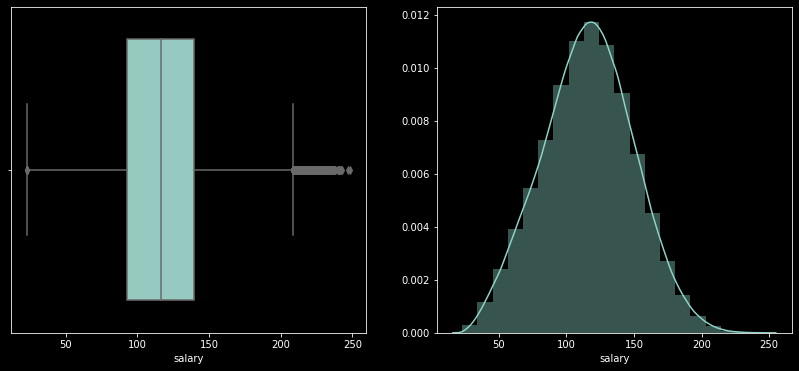

In [62]:
#Visualize target variable data 
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(test_features.salary)
plt.subplot(1,2,2)
sns.distplot(test_features.salary, bins=20)
plt.show()

In [63]:
#summarize variables
test_features.describe(include = "all")

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
count,1000000,1000000,1000000,1000000,1000000,1000000,1000000.000000,1000000.000000,1000000.000000
unique,1000000,63,8,5,9,7,NaN,NaN,NaN
top,JOB1362685478975,COMP13,VICE_PRESIDENT,HIGH_SCHOOL,NONE,SERVICE,NaN,NaN,NaN
freq,1,16130,125434,238255,534068,143161,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,12.002104,49.526414,116.058846
std,NaN,NaN,NaN,NaN,NaN,NaN,7.213179,28.889713,33.833572
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,23.032000
25%,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,25.000000,92.867863
50%,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,50.000000,116.507753
75%,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,75.000000,139.256232


In [64]:
# Function to create plots to check correlation of features with the target variable
def feature_plot(df, df2, col):
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    if df[col].dtype == 'int64' or col == 'companyId':
        mean = df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
    else:
        sns.boxplot(x = col, y = 'salary', data = df)
        
        plt.xticks(rotation = 45)
        plt.ylabel('salaries')
        plt.title('Training Data')
    plt.subplot(1, 2, 2)
    if df2[col].dtype == 'int64' or col == 'companyId':
        mean = df2.groupby(col)['salary'].mean()
        std = df2.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.4)
    else:
        sns.boxplot(x = col, y = 'salary', data = df2)
        
        plt.xticks(rotation = 45)
        plt.ylabel('Predicted salaries')
        plt.title('Test Data')
        plt.show()

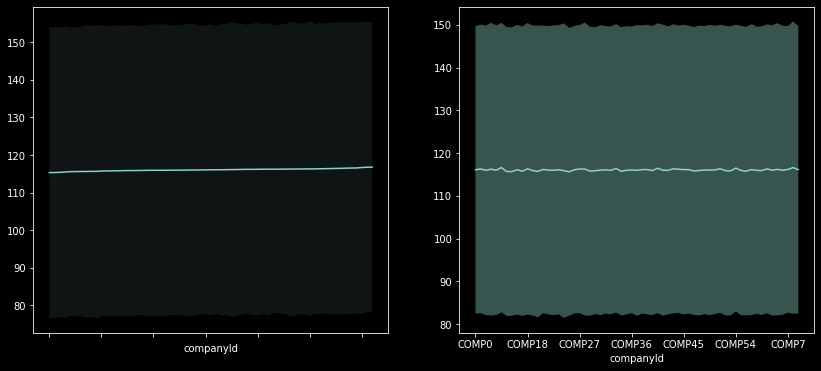

In [65]:
feature_plot(merged_train_data, test_features, 'companyId')

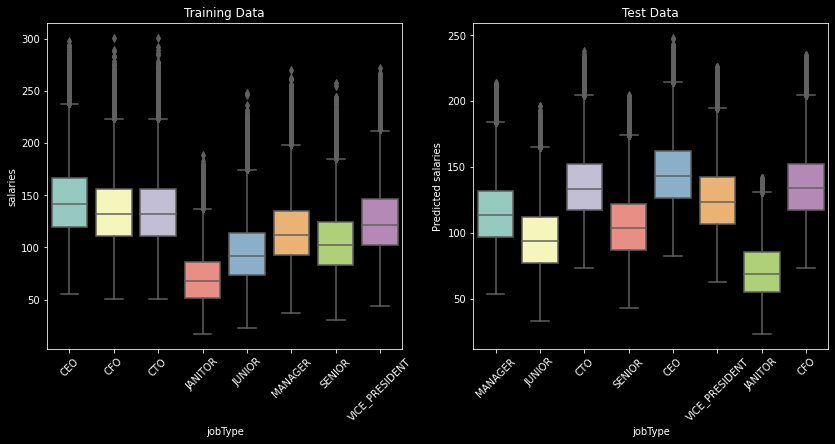

In [66]:
feature_plot(merged_train_data, test_features, 'jobType')

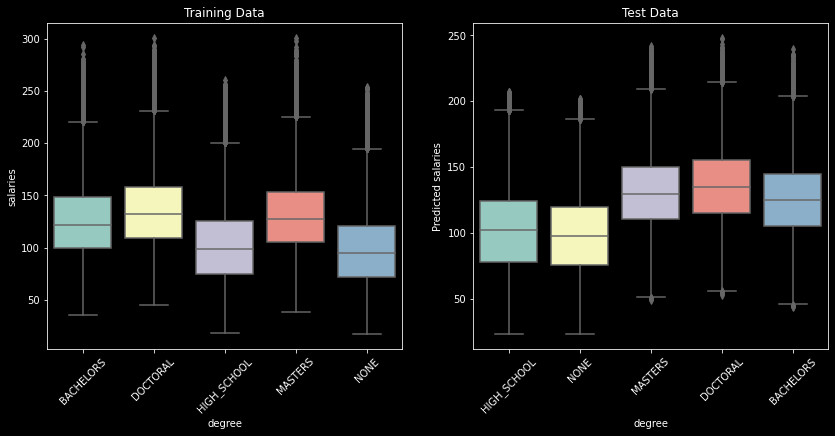

In [67]:
feature_plot(merged_train_data, test_features, 'degree')

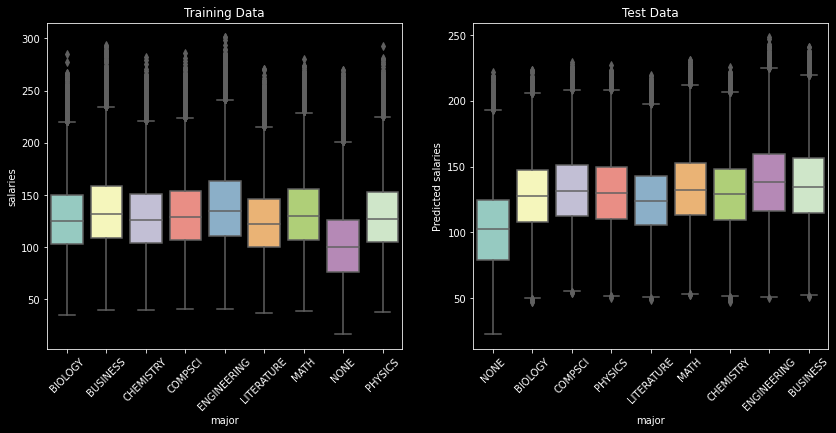

In [68]:
feature_plot(merged_train_data, test_features, 'major')

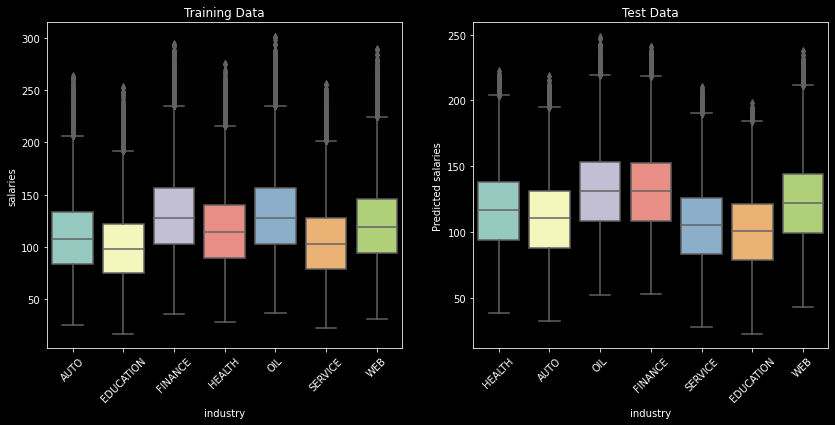

In [69]:
feature_plot(merged_train_data, test_features, 'industry')

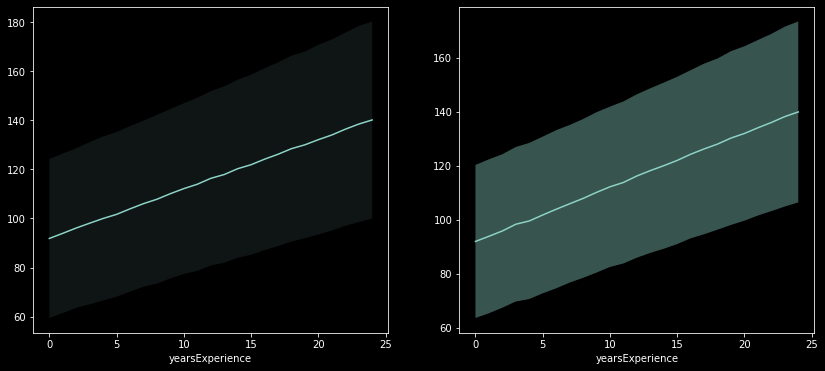

In [70]:
feature_plot(merged_train_data, test_features, 'yearsExperience')

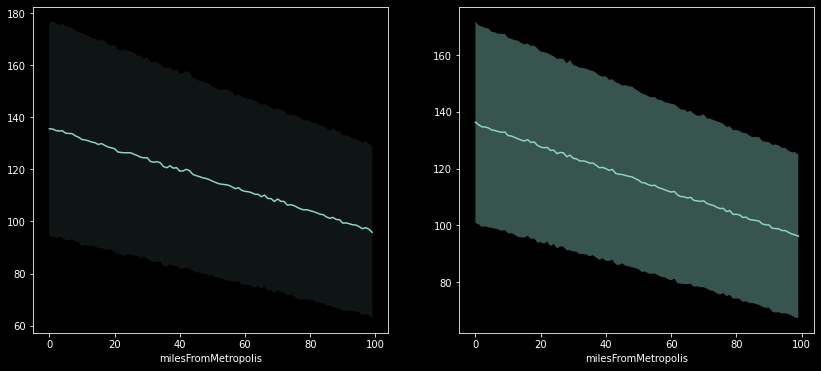

In [71]:
feature_plot(merged_train_data, test_features, 'milesFromMetropolis')